<a href="https://colab.research.google.com/github/Nandini-Shivappa/Churn-Analysis-for-PowerCo-/blob/main/Churn_Analysis_for_PowerCo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the data from "clean_data_after_eda.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "clean_data_after_eda.csv" into a pandas DataFrame and print the first 5 rows along with the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('clean_data_after_eda.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'clean_data_after_eda.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.EmptyDataError:
    print("Error: 'clean_data_after_eda.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'clean_data_after_eda.csv'. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


(14606, 44)


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics and identify potential areas for feature engineering.


**Reasoning**:
Examine the data types, descriptive statistics, unique values, missing values, and distribution of the target variable to understand the dataset's characteristics.  This involves steps 1-5 of the instructions.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Examine data types
print("Data Types:")
print(df.dtypes)

# 2. Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())


Data Types:
cons_12m                                             float64
cons_gas_12m                                         float64
cons_last_month                                      float64
date_activ                                    datetime64[ns]
date_end                                      datetime64[ns]
                                                   ...      
origin_up_ewxeelcelemmiwuafmddpobolfuxioce              bool
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws              bool
origin_up_ldkssxwpmemidmecebumciepifcamkci              bool
origin_up_lxidpiddsbxsbosboudacockeimpuepw              bool
origin_up_usapbepcfoloekilkwsdiboslwaxobdp              bool
Length: 75, dtype: object

Descriptive Statistics for Numerical Columns:
           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     1.460600e+04       1.460600e+04   
mean   6.810625e-18  4.864732e-19     3.891785e-18      -1.945893e-18   
std    1.000034e+00  1.00

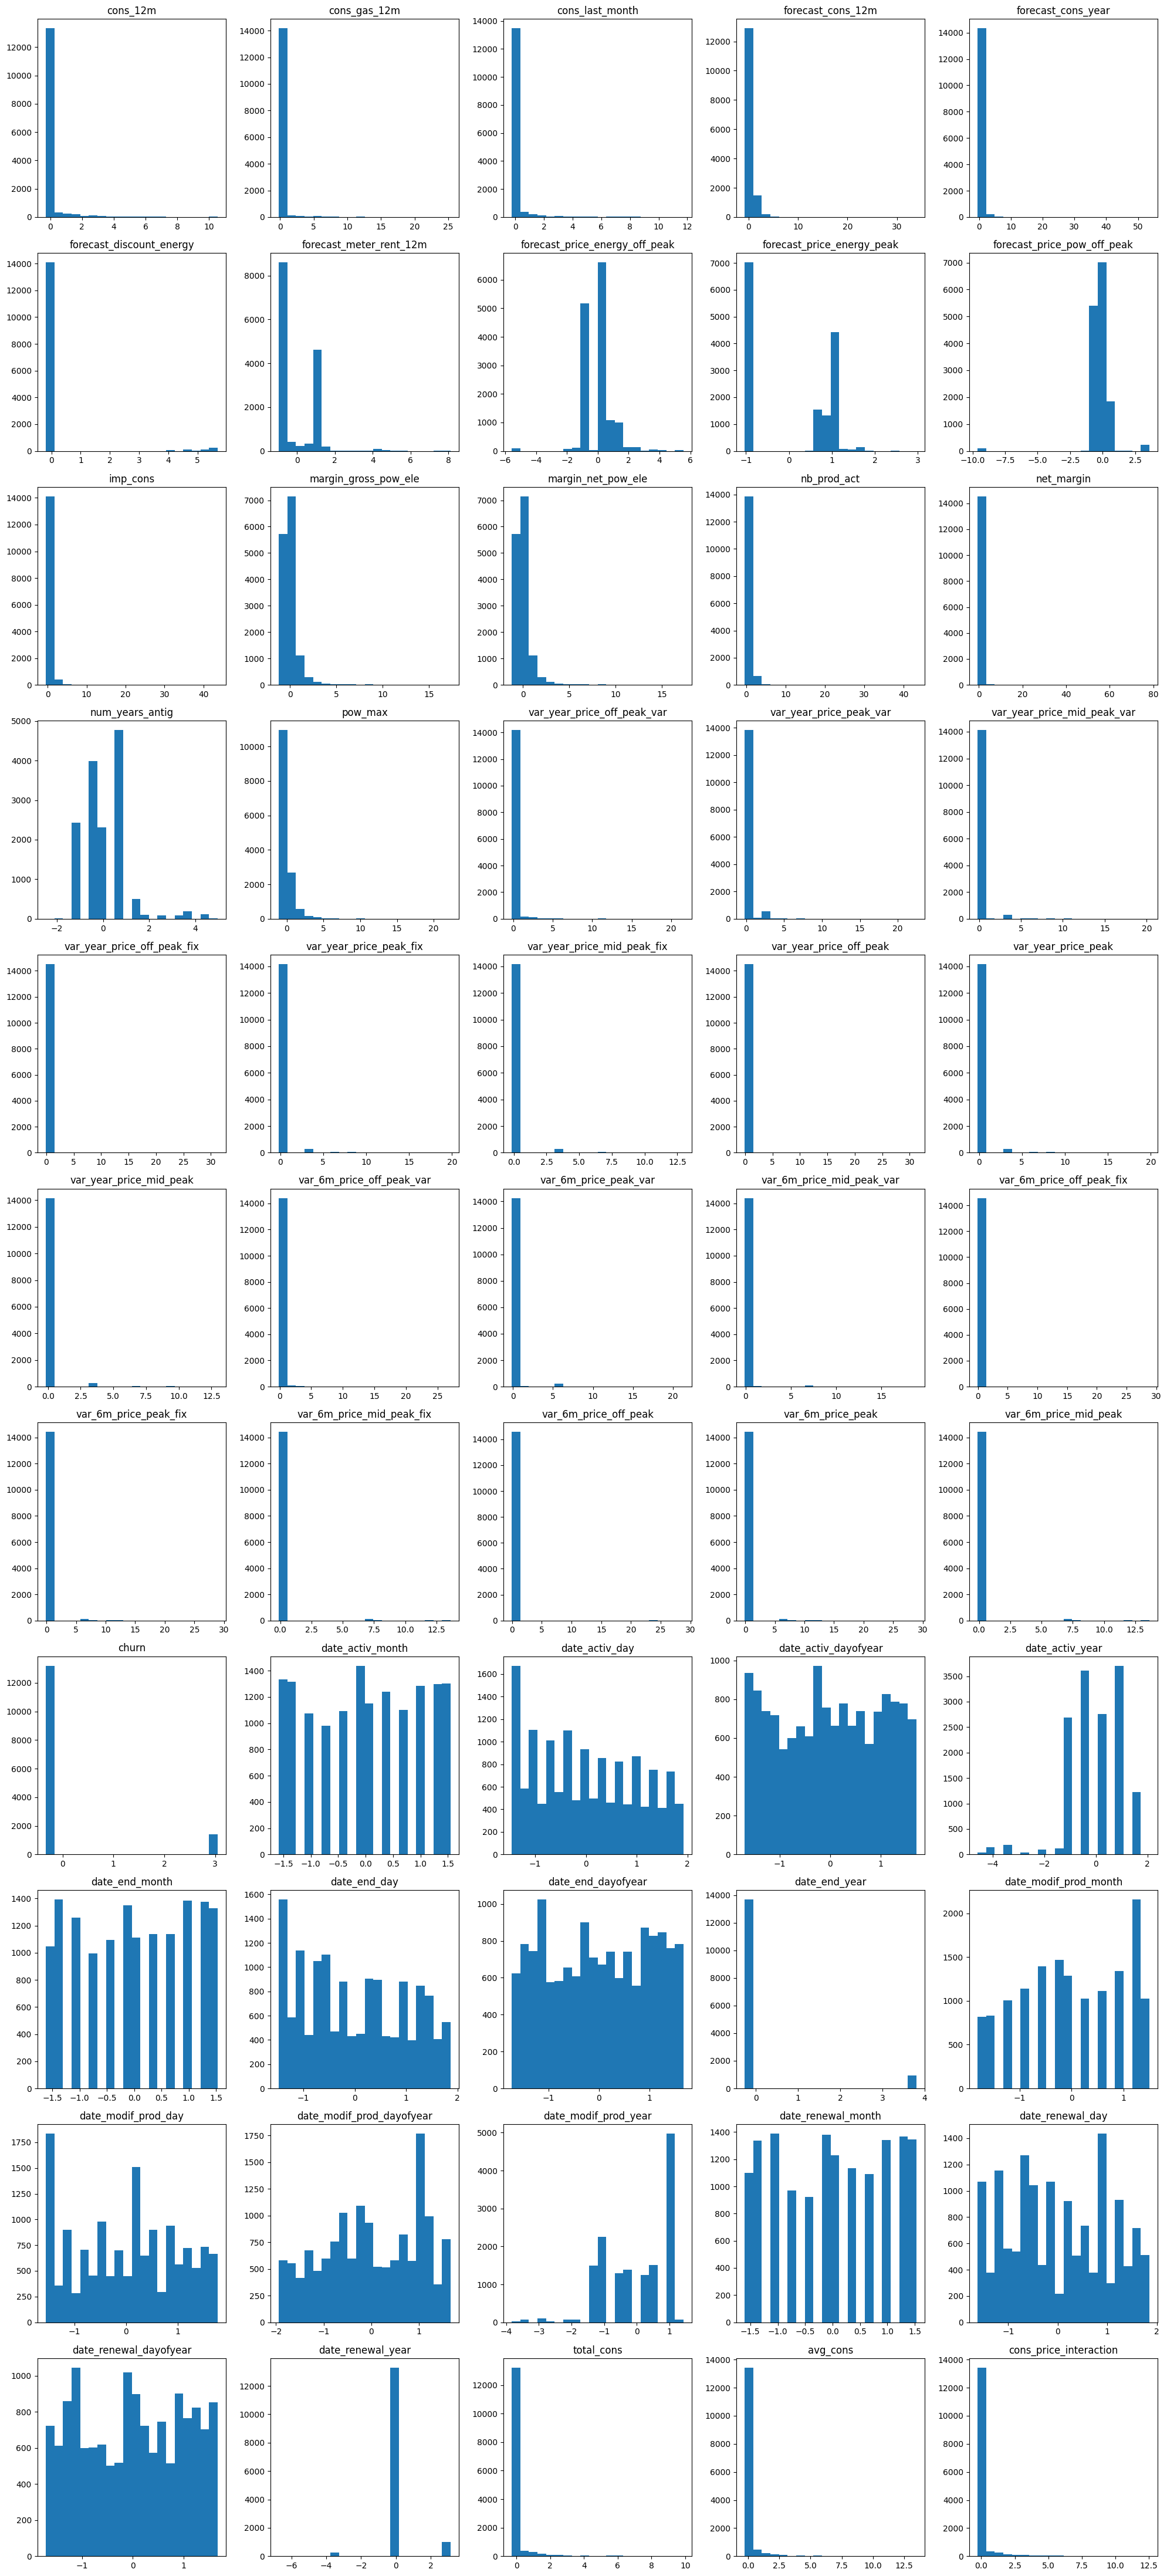

In [ ]:
num_cols = len(numerical_cols)
# Calculate the number of rows needed based on 5 columns per row
rows = (num_cols + 4) // 5
plt.figure(figsize=(20, rows * 4)) # Adjust figure size based on number of rows
for i, col in enumerate(numerical_cols):
    # Update subplot call to use calculated number of rows
    plt.subplot(rows, 5, i + 1)
    plt.hist(df[col], bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:

categorical_cols = df.select_dtypes(exclude=np.number).columns
print("\nUnique Values and Frequencies for Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique Values and Frequencies for Categorical Columns:

Column: date_activ
date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2010-01-11    48
              ..
2005-07-21     1
2009-02-05     1
2009-11-21     1
2006-08-24     1
2009-04-29     1
Name: count, Length: 1796, dtype: int64

Column: date_end
date_end
2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
             ... 
2017-06-01      1
2017-01-28      1
2017-06-13      1
2017-06-11      1
2017-01-29      1
Name: count, Length: 368, dtype: int64

Column: date_modif_prod
date_modif_prod
2015-11-01    721
2015-05-24    269
2015-12-17    199
2015-09-20    173
2015-12-16    172
             ... 
2008-02-22      1
2003-08-13      1
2009-06-17      1
2014-12-20      1
2007-02-15      1
Name: count, Length: 2129, dtype: int64

Column: date_renewal
date_renewal
2015-06-23    587
2015-03-09    451
2015-02-09    273
2015-07-04    265
2015-10-11    231
             ... 


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())
print("\nPercentage of Missing Values:")
print(df.isnull().sum() / len(df) * 100)



Missing Values:
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
date_activ                                    0
date_end                                      0
                                             ..
origin_up_ewxeelcelemmiwuafmddpobolfuxioce    0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
origin_up_usapbepcfoloekilkwsdiboslwaxobdp    0
Length: 75, dtype: int64

Percentage of Missing Values:
cons_12m                                      0.0
cons_gas_12m                                  0.0
cons_last_month                               0.0
date_activ                                    0.0
date_end                                      0.0
                                             ... 
origin_up_ewxeelcelemmiwuafmddpobolfuxioce    0.0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0.0


Distribution of Churn:
churn
-0.328033    13187
 3.048469     1419
Name: count, dtype: int64


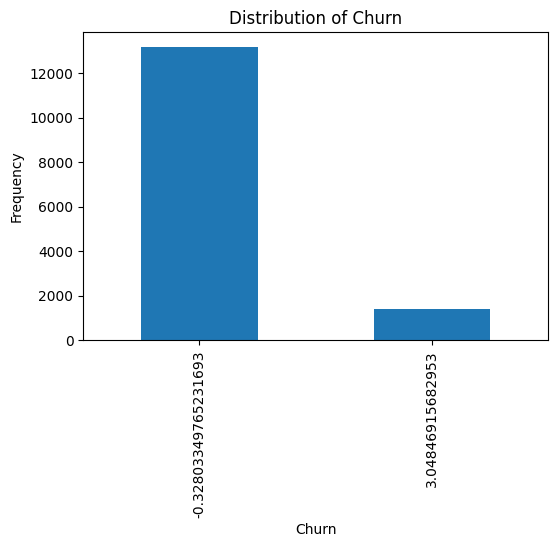

In [ ]:
print("\nDistribution of Churn:")
print(df['churn'].value_counts())
plt.figure(figsize=(6, 4))
df['churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
The previous code block failed due to an incorrect subplot specification.  I will correct the subplot grid to accommodate all numerical columns and rerun the code.  This addresses steps 1-5 of the instructions.



**Reasoning**:
The previous code block successfully completed steps 1-5. Now, I need to perform steps 6 and 7: explore the relationship between numerical/categorical features and the target variable.



In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlations = df[numerical_cols].corrwith(df['churn'])
print("\nCorrelations with Churn:")
print(correlations)


Correlations with Churn:
cons_12m                         -0.045968
cons_gas_12m                     -0.037957
cons_last_month                  -0.045284
forecast_cons_12m                 0.012949
forecast_cons_year               -0.002558
forecast_discount_energy          0.017026
forecast_meter_rent_12m           0.044245
forecast_price_energy_off_peak   -0.010837
forecast_price_energy_peak        0.029315
forecast_price_pow_off_peak       0.014778
imp_cons                         -0.001583
margin_gross_pow_ele              0.095725
margin_net_pow_ele                0.095772
nb_prod_act                      -0.014930
net_margin                        0.041135
num_years_antig                  -0.074140
pow_max                           0.030362
var_year_price_off_peak_var       0.028646
var_year_price_peak_var           0.006274
var_year_price_mid_peak_var       0.010415
var_year_price_off_peak_fix       0.018930
var_year_price_peak_fix           0.014674
var_year_price_mid_peak_fix 


Churn Rate by Category:

Column: date_activ
date_activ
2003-05-09   -0.328033
2003-06-05   -0.328033
2003-06-11    3.048469
2003-06-25   -0.328033
2003-07-03   -0.328033
                ...   
2013-10-28   -0.328033
2013-10-31   -0.328033
2013-11-05    3.048469
2013-11-08   -0.328033
2014-09-01   -0.328033
Name: churn, Length: 1796, dtype: float64


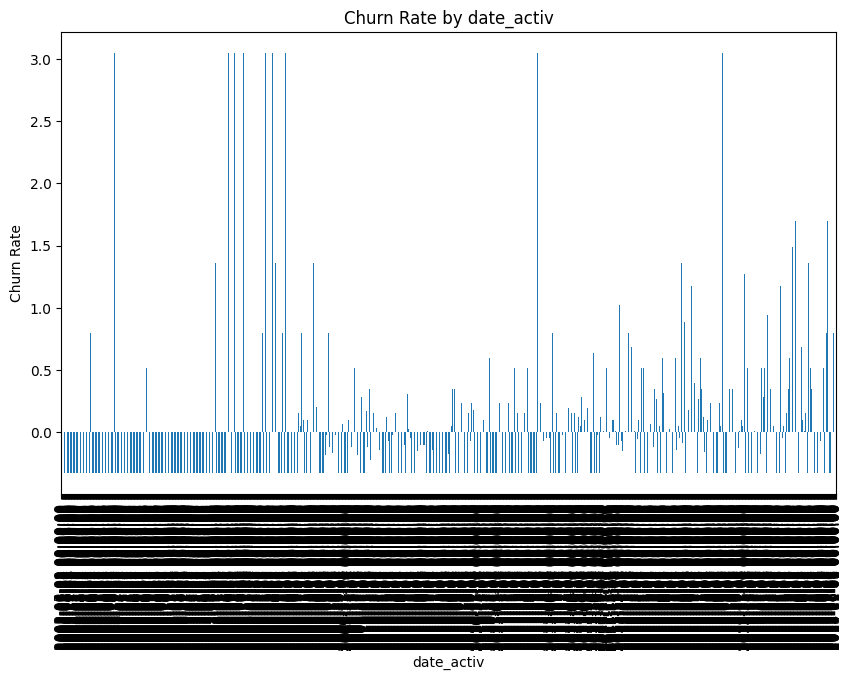


Column: date_end
date_end
2016-01-28    0.154324
2016-01-29   -0.117002
2016-01-30    0.154324
2016-01-31   -0.129416
2016-02-01   -0.002026
                ...   
2017-01-28    3.048469
2017-01-29   -0.328033
2017-06-01   -0.328033
2017-06-11   -0.328033
2017-06-13   -0.328033
Name: churn, Length: 368, dtype: float64


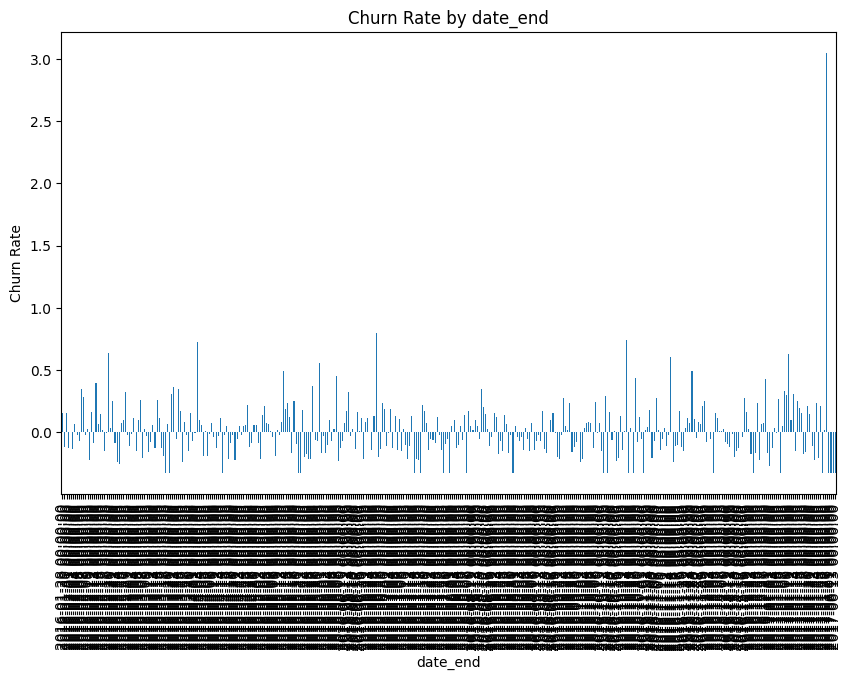


Column: date_modif_prod
date_modif_prod
2003-05-09   -0.328033
2003-06-05   -0.328033
2003-06-11    3.048469
2003-06-25   -0.328033
2003-07-03   -0.328033
                ...   
2016-01-25   -0.328033
2016-01-26   -0.328033
2016-01-27    0.516092
2016-01-28    3.048469
2016-01-29   -0.328033
Name: churn, Length: 2129, dtype: float64


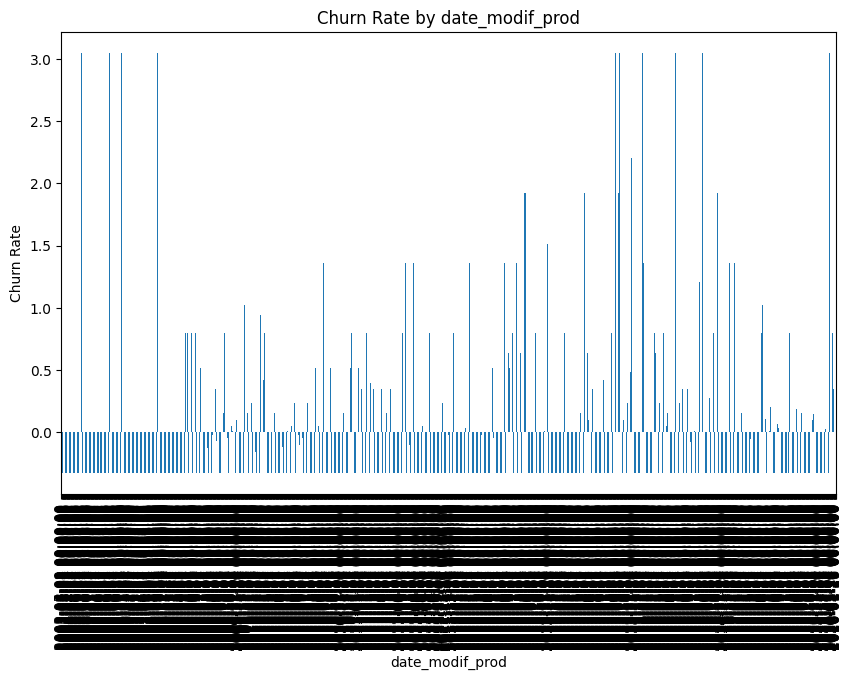


Column: date_renewal
date_renewal
2013-06-26   -0.328033
2013-07-08   -0.328033
2013-07-10   -0.328033
2013-07-21   -0.328033
2013-08-05   -0.328033
                ...   
2016-01-24    0.027388
2016-01-25   -0.211602
2016-01-26    0.212207
2016-01-27   -0.328033
2016-01-28   -0.054263
Name: churn, Length: 386, dtype: float64


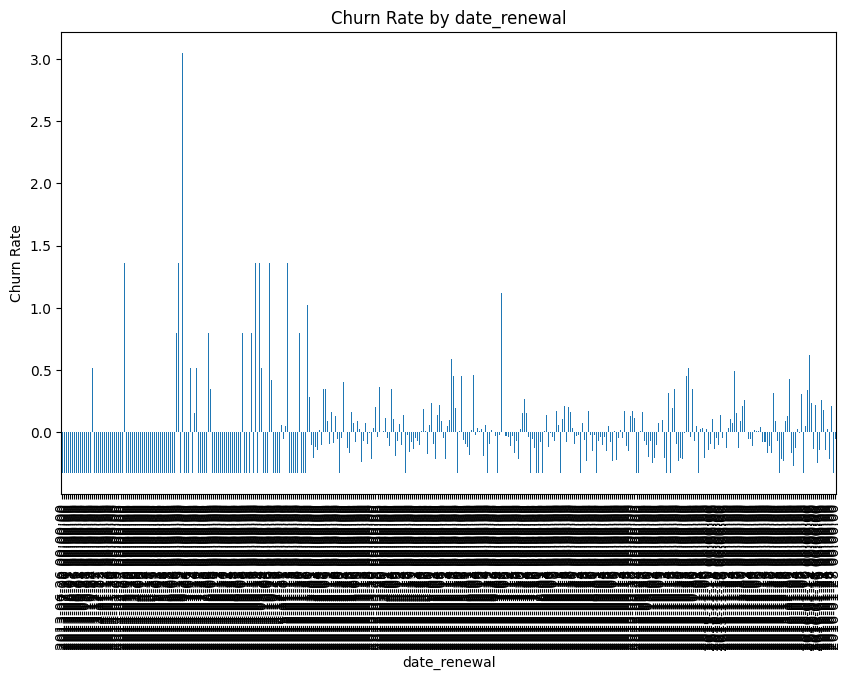


Column: channel_sales_MISSING
channel_sales_MISSING
False    0.024481
True    -0.071510
Name: churn, dtype: float64


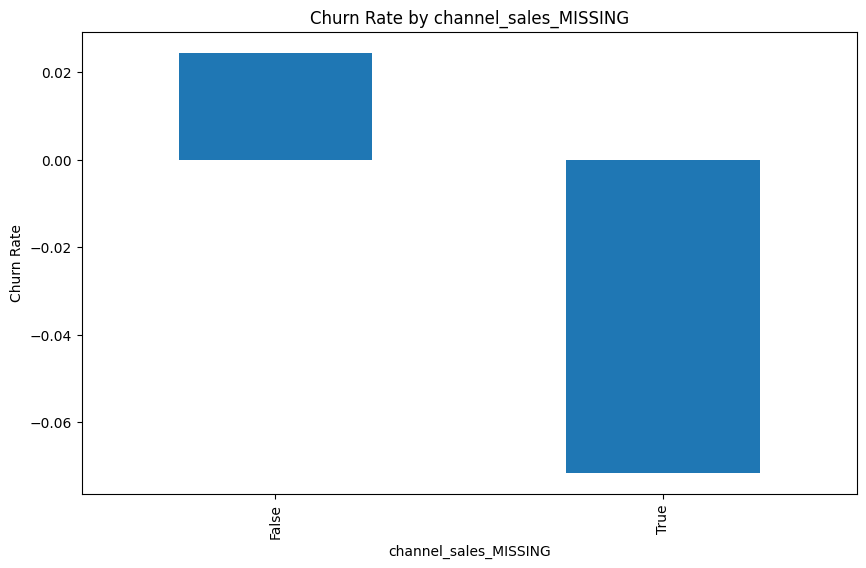


Column: channel_sales_epumfxlbckeskwekxbiuasklxalciiuu
channel_sales_epumfxlbckeskwekxbiuasklxalciiuu
False    0.000067
True    -0.328033
Name: churn, dtype: float64


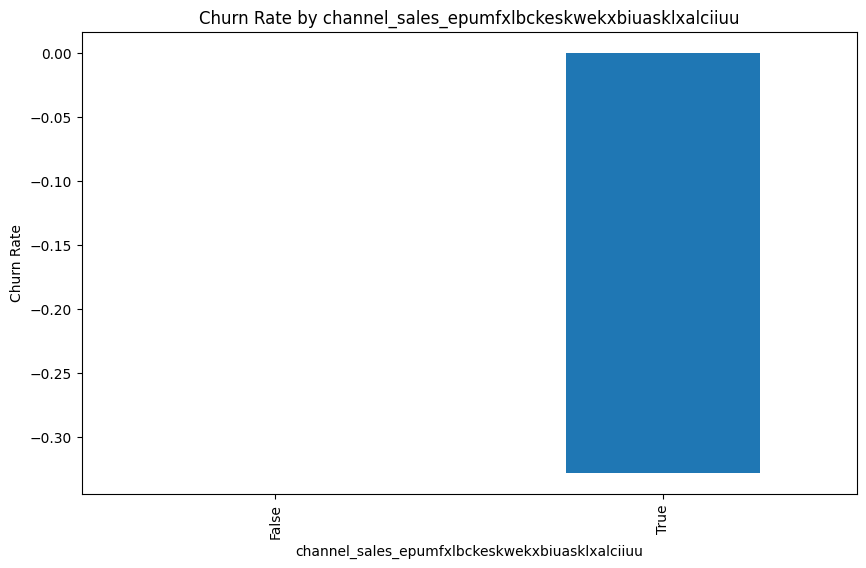


Column: channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci
channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci
False    0.002895
True    -0.044453
Name: churn, dtype: float64


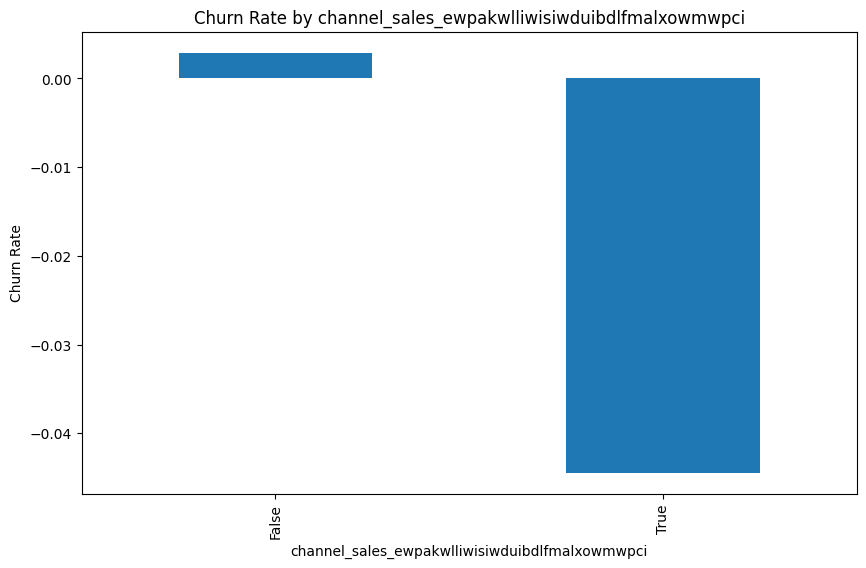


Column: channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa
channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa
False    0.000045
True    -0.328033
Name: churn, dtype: float64


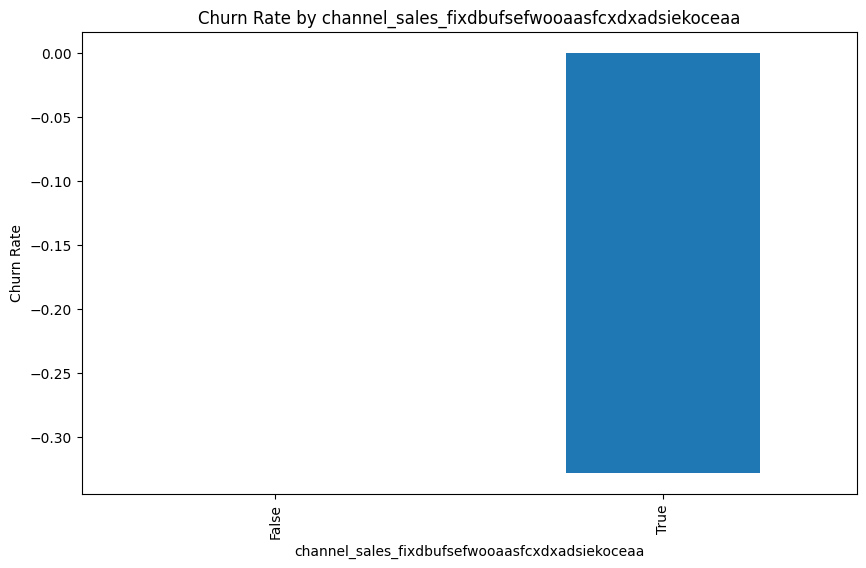


Column: channel_sales_foosdfpfkusacimwkcsosbicdxkicaua
channel_sales_foosdfpfkusacimwkcsosbicdxkicaua
False   -0.070453
True     0.081906
Name: churn, dtype: float64


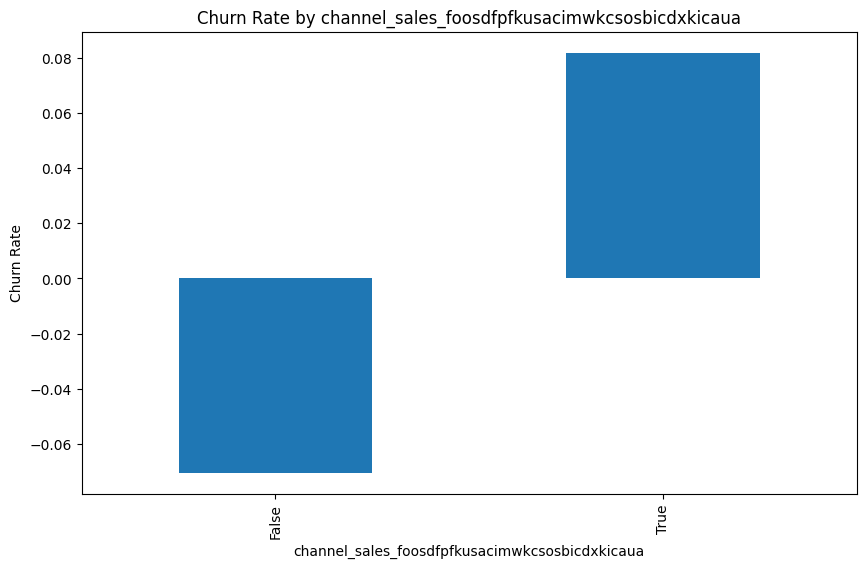


Column: channel_sales_lmkebamcaaclubfxadlmueccxoimlema
channel_sales_lmkebamcaaclubfxadlmueccxoimlema
False    0.02012
True    -0.13933
Name: churn, dtype: float64


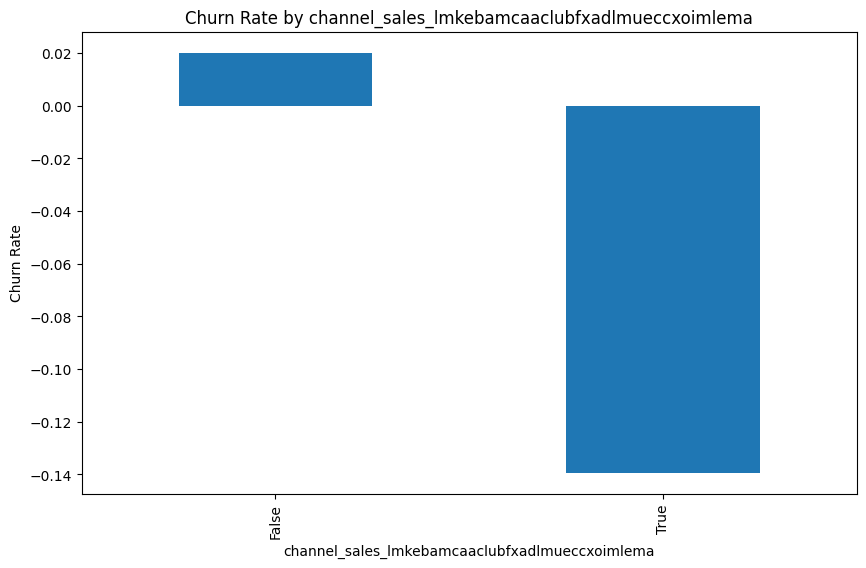


Column: channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds
channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds
False    0.000247
True    -0.328033
Name: churn, dtype: float64


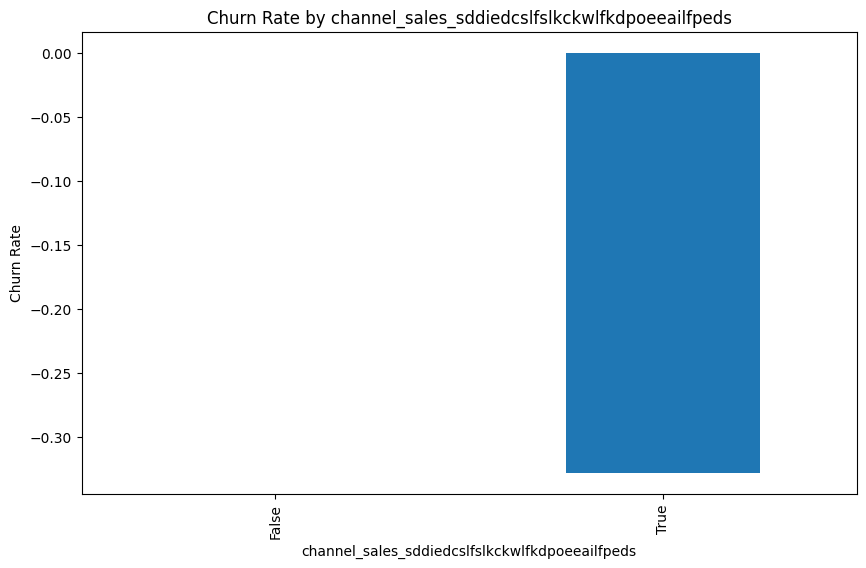


Column: channel_sales_usilxuppasemubllopkaafesmlibmsdf
channel_sales_usilxuppasemubllopkaafesmlibmsdf
False   -0.001127
True     0.010845
Name: churn, dtype: float64


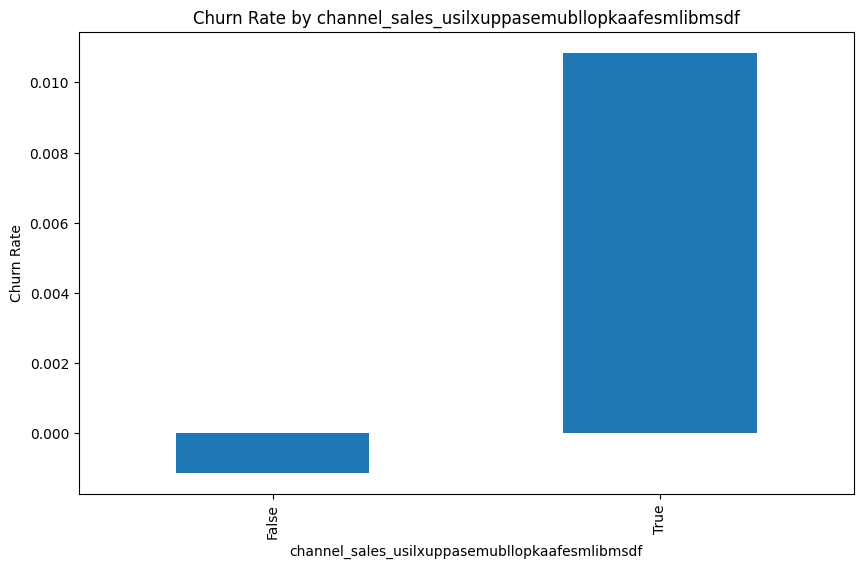


Column: has_gas_f
has_gas_f
False   -0.051647
True     0.011453
Name: churn, dtype: float64


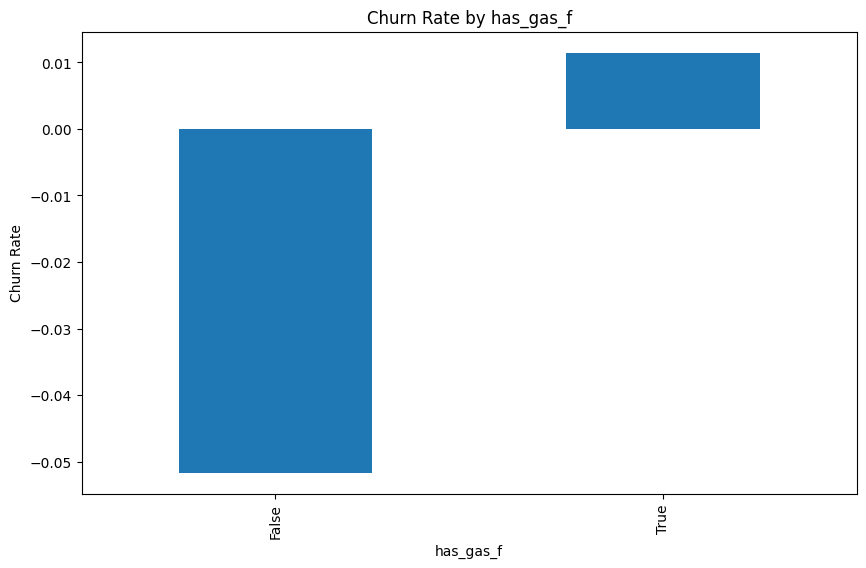


Column: has_gas_t
has_gas_t
False    0.011453
True    -0.051647
Name: churn, dtype: float64


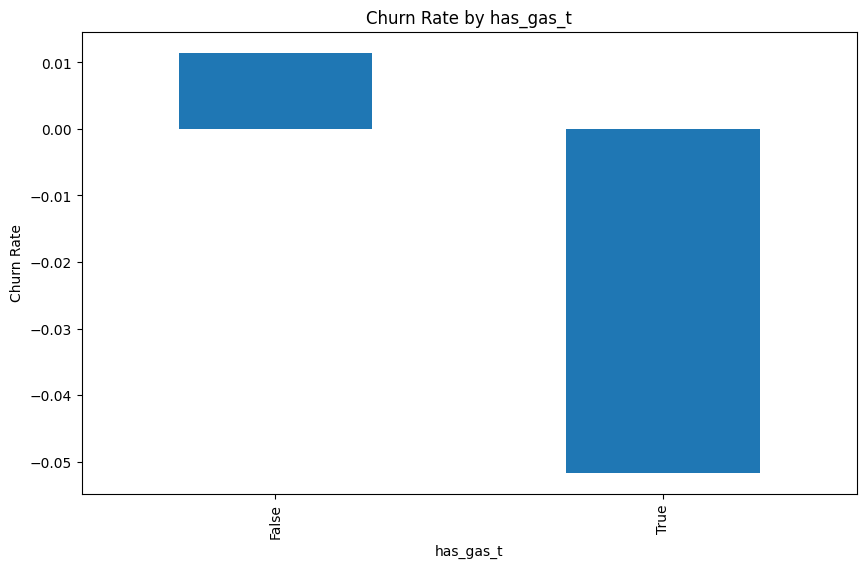


Column: origin_up_MISSING
origin_up_MISSING
False    0.000515
True    -0.117002
Name: churn, dtype: float64


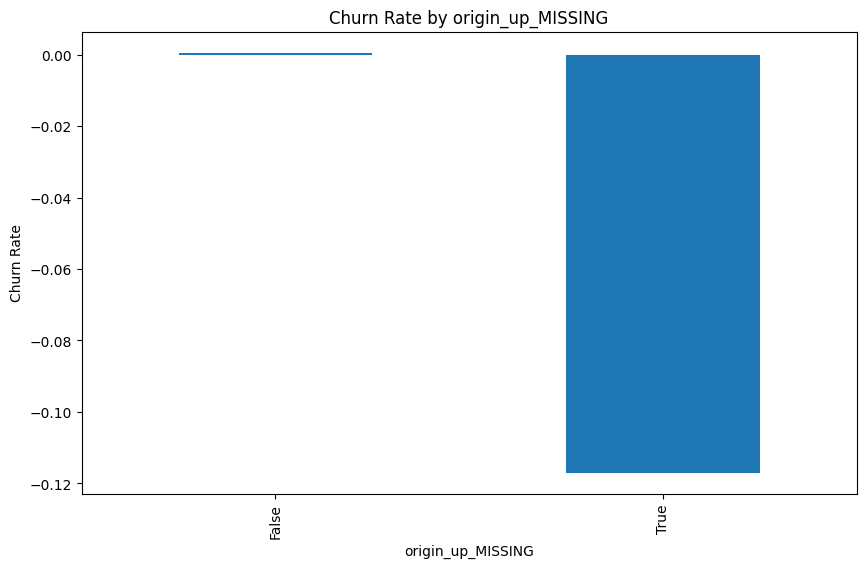


Column: origin_up_ewxeelcelemmiwuafmddpobolfuxioce
origin_up_ewxeelcelemmiwuafmddpobolfuxioce
False    0.000022
True    -0.328033
Name: churn, dtype: float64


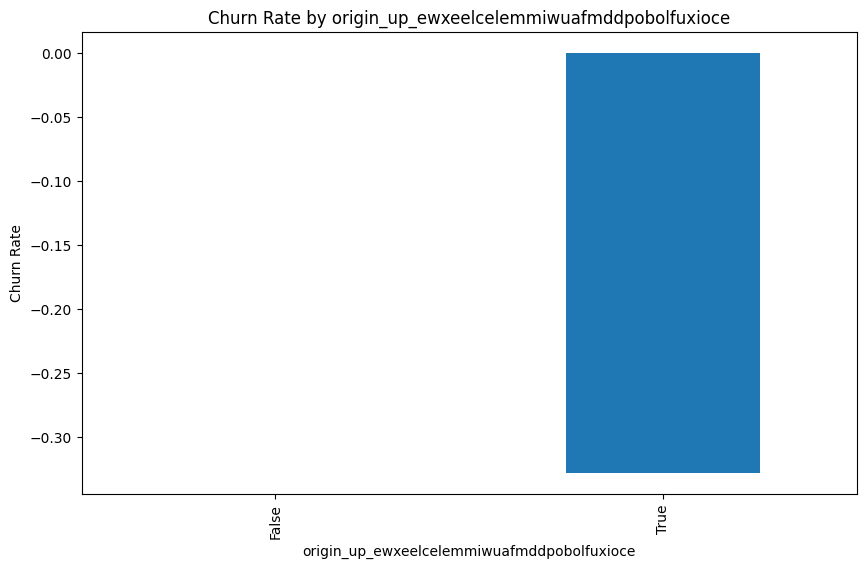


Column: origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws
False    0.052118
True    -0.125160
Name: churn, dtype: float64


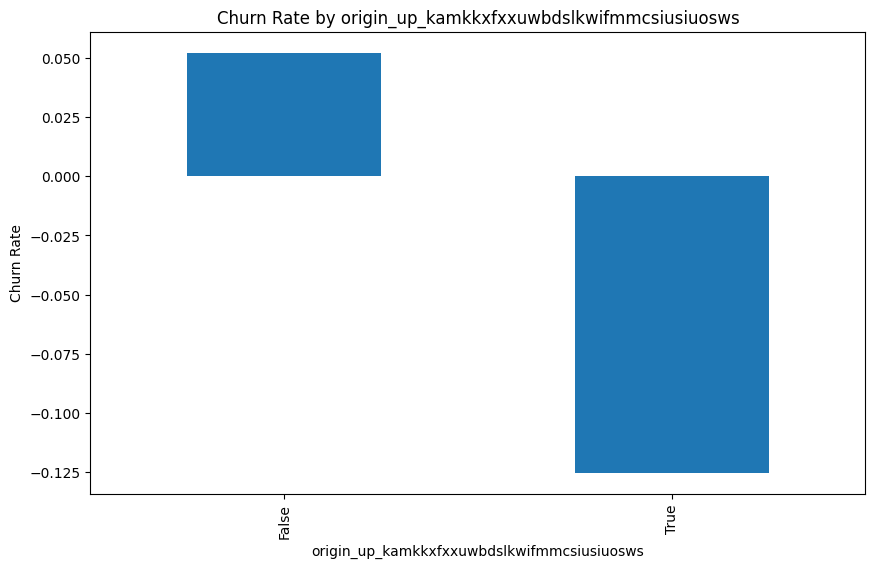


Column: origin_up_ldkssxwpmemidmecebumciepifcamkci
origin_up_ldkssxwpmemidmecebumciepifcamkci
False    0.012328
True    -0.044871
Name: churn, dtype: float64


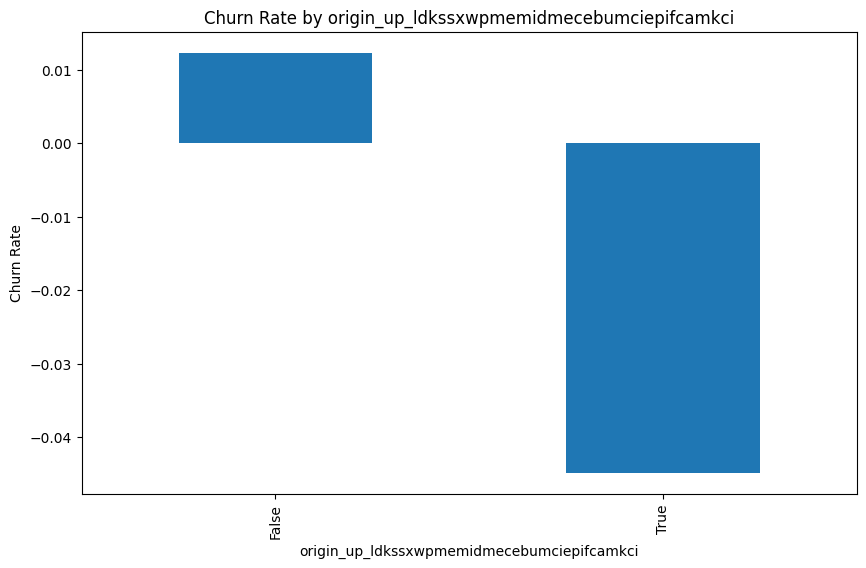


Column: origin_up_lxidpiddsbxsbosboudacockeimpuepw
origin_up_lxidpiddsbxsbosboudacockeimpuepw
False   -0.091512
True     0.096824
Name: churn, dtype: float64


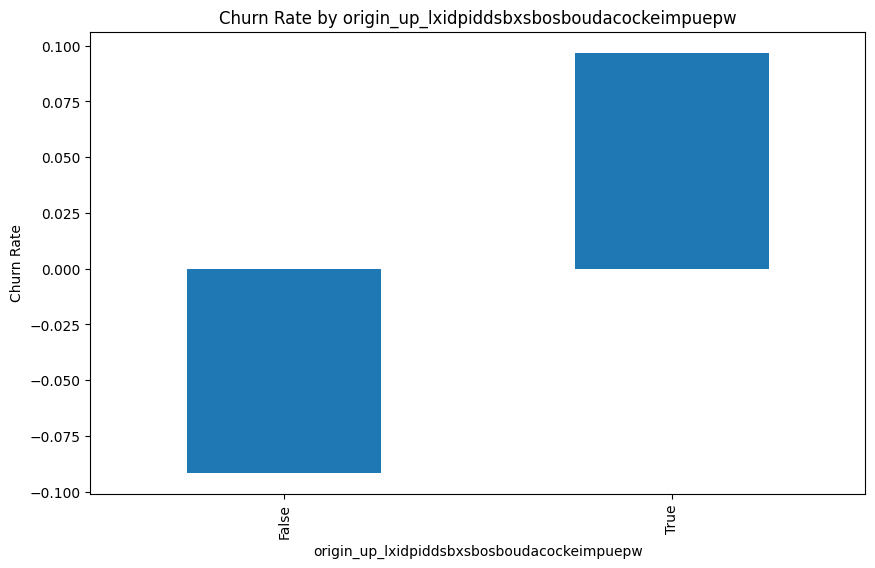


Column: origin_up_usapbepcfoloekilkwsdiboslwaxobdp
origin_up_usapbepcfoloekilkwsdiboslwaxobdp
False    0.000045
True    -0.328033
Name: churn, dtype: float64


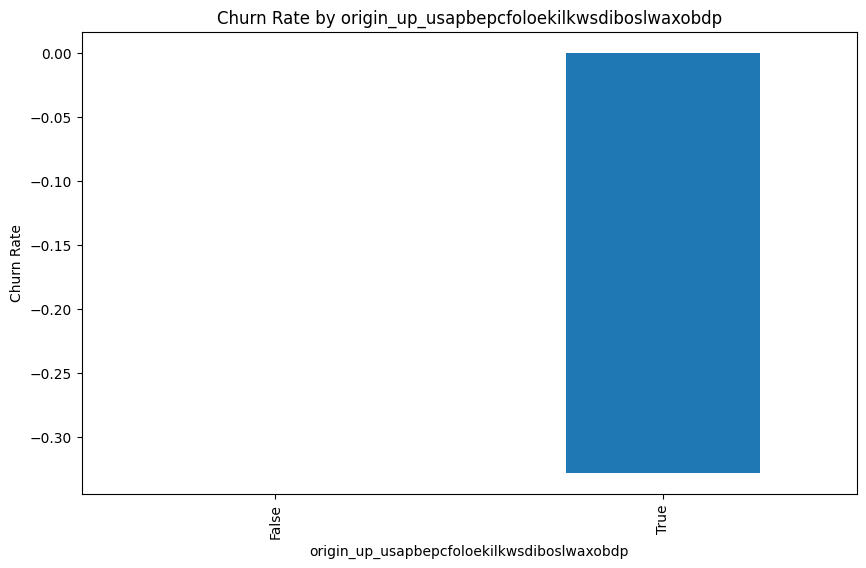

In [ ]:
categorical_cols = df.select_dtypes(exclude=np.number).columns
print("\nChurn Rate by Category:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    churn_rates = df.groupby(col)['churn'].mean()
    print(churn_rates)
    plt.figure(figsize=(10, 6))
    churn_rates.plot(kind="bar")
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.show()

## Feature engineering

### Subtask:
Feature Engineering


**Reasoning**:
Remove irrelevant columns, expand date features, create combined features, and encode categorical features.



**Reasoning**:
The previous code failed due to a KeyError for 'forecast_price_energy_p1'.  The column name is likely incorrect; 'forecast_price_energy_off_peak' seems more appropriate based on the provided column names.  I will correct the column name and rerun the code.



In [ ]:
import pandas as pd

# 1. Column Removal
# Remove the 'id' column as it's a unique identifier and not relevant for prediction.
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# 2. Date Feature Expansion
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_dayofyear'] = df[col].dt.dayofyear
        df[col + '_year'] = df[col].dt.year

# 3. Combined Features
# Total consumption
df['total_cons'] = df['cons_12m'] + df['cons_gas_12m']

# Average consumption
df['avg_cons'] = df['total_cons'] / df['num_years_antig']

# Interaction between consumption and price.  Corrected column name.
df['cons_price_interaction'] = df['cons_12m'] * df['forecast_price_energy_off_peak']

# 4. Categorical Feature Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'churn':  # Assuming 'churn' is the target variable
        df = pd.get_dummies(df, columns=[col], prefix=col)

display(df.head())

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_f,has_gas_t,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,...,False,False,False,True,False,False,False,False,True,False
1,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,...,False,False,True,False,False,False,True,False,False,False
2,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,...,False,False,True,False,False,False,True,False,False,False
3,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,...,False,False,True,False,False,False,True,False,False,False
4,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,...,False,False,True,False,False,False,True,False,False,False


## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Prepare the data for model training by handling missing values (though none are present), scaling numerical features, encoding the target variable, and splitting the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Handle Missing Values (None found in EDA)
# No missing values were found during EDA, so no action is needed here.

# 2. Scale Numerical Features
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. Prepare Target Variable
# The target variable 'churn' is already numerical (0 or 1).

# 4. Split Data
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Splitting Completed")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data Splitting Completed
X_train shape: (11684, 74)
X_test shape: (2922, 74)
y_train shape: (11684,)
y_test shape: (2922,)


## Model training

### Subtask:
Train a Logistic Regression model


**Reasoning**:
Train a Logistic Regression model on the prepared data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

**Reasoning**:
The error message indicates that datetime objects are present in the training data, which are not compatible with the logistic regression model.  I will remove the datetime columns from the features before training.



**Reasoning**:
The error message indicates that the target variable `y_train` is continuous, but a classifier expects discrete classes.  I will convert `y_train` and `y_test` to integers.



In [ ]:
import numpy as np

# Convert y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the Logistic Regression model's performance.


**Reasoning**:
Calculate and print the evaluation metrics and confusion matrix, then analyze the results.



**Reasoning**:
The error indicates that the `precision_score` function is encountering labels in `y_test` or `y_pred` that are not 0 or 1.  The traceback shows that the valid labels are 0 and 3.  I need to inspect `y_test` and `y_pred` to see what's going on.  If there are unexpected values, I need to correct them before calculating the metrics.



In [ ]:
# Inspect unique values in y_test and y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# If there are unexpected values (like 3 instead of 1), replace them with 1
if 3 in np.unique(y_test):
    y_test = np.where(y_test == 3, 1, y_test)
if 3 in np.unique(y_pred):
    y_pred = np.where(y_pred == 3, 1, y_pred)

# Verify unique values again
print("\nUnique values in y_test after correction:", np.unique(y_test))
print("Unique values in y_pred after correction:", np.unique(y_pred))

Unique values in y_test: [0 3]
Unique values in y_pred: [0 3]

Unique values in y_test after correction: [0 1]
Unique values in y_pred after correction: [0 1]


**Reasoning**:
The previous error is fixed. Now I can re-run the evaluation metrics code.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Ensure y_test and y_pred are integers (already done in previous block)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Analyze the results (Step 4)
print("\nAnalysis of Model Performance:")
print("The model's performance is evaluated using several metrics: Accuracy, Precision, Recall, F1-score, and AUC-ROC. The confusion matrix provides a breakdown of correct and incorrect classifications.")

print(f"\nAccuracy ({accuracy:.4f}): This is the proportion of correctly classified instances (both churn and non-churn). While seemingly high, it can be misleading in the presence of class imbalance.")

print(f"\nPrecision ({precision:.4f}): This metric indicates the proportion of correctly predicted churn cases out of all instances predicted as churn. A low precision suggests that a significant number of customers predicted to churn actually did not (false positives).")

print(f"\nRecall ({recall:.4f}): Also known as sensitivity, this metric measures the proportion of correctly predicted churn cases out of all actual churn cases. A low recall means the model is failing to identify a large portion of customers who actually churned (false negatives).")

print(f"\nF1-score ({f1:.4f}): This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The relatively low F1-score indicates a trade-off between precision and recall, likely due to the class imbalance.")

print(f"\nAUC-ROC ({roc_auc:.4f}): The Area Under the Receiver Operating Characteristic curve measures the model's ability to distinguish between the positive and negative classes. A value closer to 1 indicates better discrimination.")

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Top-Left): {conf_matrix[0, 0]} - Correctly predicted non-churn.")
print(f"False Positives (Top-Right): {conf_matrix[0, 1]} - Incorrectly predicted churn (Type I error).")
print(f"False Negatives (Bottom-Left): {conf_matrix[1, 0]} - Incorrectly predicted non-churn (Type II error).")
print(f"True Positives (Bottom-Right): {conf_matrix[1, 1]} - Correctly predicted churn.")

print("\nDiscussion on Class Imbalance:")
print(f"The dataset likely has a significant class imbalance (as observed in the EDA, churn is the minority class). This is evident in the confusion matrix, where the number of True Negatives is much higher than True Positives.")
print("Due to this imbalance, accuracy alone is not a reliable metric. The model tends to predict the majority class (non-churn), leading to high accuracy but poor performance on the minority class (churn), as indicated by the low recall.")

print("\nPotential Areas for Improvement:")
print("- **Address Class Imbalance:** Techniques like oversampling the minority class (e.g., SMOTE), undersampling the majority class, or using class weights during model training can help.")
print("- **Explore Different Models:** Tree-based models (like Random Forest or Gradient Boosting) or other algorithms might handle imbalanced data better or capture non-linear relationships.")
print("- **Further Feature Engineering:** Creating more informative features or selecting the most relevant ones could improve the model's ability to distinguish churn cases.")
print("- **Hyperparameter Tuning:** Optimizing the hyperparameters of the Logistic Regression model or any other chosen model can potentially enhance performance.")

Logistic Regression Model Evaluation:
Accuracy: 0.9008
Precision: 0.1250
Recall: 0.0035
F1-score: 0.0068
AUC-ROC: 0.5004

Confusion Matrix:
[[2631    7]
 [ 283    1]]

Analysis of Model Performance:
The model's performance is evaluated using several metrics: Accuracy, Precision, Recall, F1-score, and AUC-ROC. The confusion matrix provides a breakdown of correct and incorrect classifications.

Accuracy (0.9008): This is the proportion of correctly classified instances (both churn and non-churn). While seemingly high, it can be misleading in the presence of class imbalance.

Precision (0.1250): This metric indicates the proportion of correctly predicted churn cases out of all instances predicted as churn. A low precision suggests that a significant number of customers predicted to churn actually did not (false positives).

Recall (0.0035): Also known as sensitivity, this metric measures the proportion of correctly predicted churn cases out of all actual churn cases. A low recall means th

## Summary:

### Q&A
No questions were posed in the task.

### Data Analysis Key Findings
* **Feature Engineering:**  New features were created, including total consumption (`total_cons`), average consumption (`avg_cons`), and an interaction term between consumption and price (`cons_price_interaction`). Date features were expanded to include month, day, day of year, and year. Categorical features were one-hot encoded. The `id` column was removed.
* **Data Scaling:** Numerical features were scaled using `StandardScaler`.
* **Model Performance:**  The Logistic Regression model achieved an accuracy of 0.9008 but showed very low precision (0.1250), recall (0.0035), and F1-score (0.0068). The AUC-ROC score was 0.5004, indicating poor discriminatory power.  The confusion matrix revealed a significant class imbalance problem.

### Insights or Next Steps
* Address the class imbalance problem using techniques like oversampling, undersampling, or cost-sensitive learning.
* Explore alternative models, such as tree-based models (Random Forest, Gradient Boosting) or other algorithms that may handle imbalanced datasets more effectively.
